In [166]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US', tz=360)


In [167]:
kw_list = ["Bread","Ferrari"]
pytrends.build_payload(kw_list=kw_list, timeframe=['today 3-m', 'today 3-m'], geo = 'US')
overTime = pytrends.interest_over_time()

/Users/mishangagnon/opt/anaconda3/envs/si206/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [168]:
kw_list = ["food near me"]
pytrends.build_payload(kw_list=kw_list, timeframe=['today 3-m'], geo = 'US')
overTime = pytrends.interest_by_region(resolution='CITY')

In [169]:
print(test)

None


In [170]:
overTime = pytrends.interest_over_time()


/Users/mishangagnon/opt/anaconda3/envs/si206/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


In [171]:
interest_over_time_df.head()

,ice_cream
date,
2019-04-28,47
2019-05-05,57
2019-05-12,57
2019-05-19,58
2019-05-26,65


/Users/mishangagnon/opt/anaconda3/envs/si206/lib/python3.12/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


<Axes: >

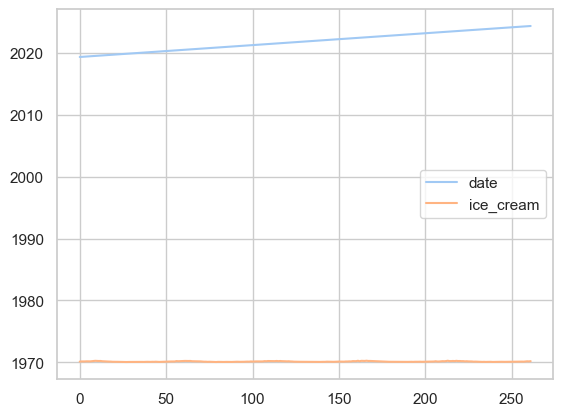

In [172]:
from pytrends.request import TrendReq
import pandas as pd

# Initialize a TrendReq object
pytrend = TrendReq(hl='en-US', tz=360)  # 'hl' is the host language, 'tz' is the timezone offset

# Define the search keyword and the region
keyword = 'ice cream'
geo = 'US-MI-505'  # Michigan, USA as the region, you might need to adjust this for more specific local data

# Build the payload
pytrend.build_payload(kw_list=[keyword], geo=geo, timeframe='today 5-y')  # Adjust timeframe as needed

# Get interest over time
interest_over_time_df = pytrend.interest_over_time()
interest_over_time_df.drop('isPartial', axis =1, inplace=True)
interest_over_time_df = interest_over_time_df.reset_index()
interest_over_time_df.columns = interest_over_time_df.columns.str.replace(' ', '_', regex=True)



# Display the data
interest_over_time_df.plot(kind = 'line')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       262 non-null    datetime64[ns]
 1   ice_cream  262 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [210]:
def set_up_database(db_name):
    conn = sqlite3.connect("/Users/mishangagnon/si206/si206-final-project" + "/" + db_name)
    cur = conn.cursor()
    return conn

def create_table_from_df(df, table_name, conn):
    # Start the CREATE TABLE statement
    sql = f"CREATE TABLE IF NOT EXISTS {table_name} ("
    
    # Add columns with appropriate data types
    columns = []
    for col_name, dtype in df.dtypes.items():
        col_type = 'TEXT'  # Default type
        if pd.api.types.is_integer_dtype(dtype):
            col_type = 'INTEGER'
        elif pd.api.types.is_float_dtype(dtype):
            col_type = 'REAL'
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            col_type = 'DATETIME'
        # Add column specification
        columns.append(f"{col_name} {col_type}")
    
    # Complete the SQL statement
    sql += ", ".join(columns)
    sql += ")"
    
    # Execute the SQL statement
    cur = conn.cursor()
    cur.execute(sql)
    conn.commit()


def get_oldest_date(table_name, date_col_name, conn):

    # Create a cursor object using the connection
    cur = conn.cursor()
    
    # Execute the query to find the oldest date
    cur.execute(f"SELECT MIN({date_col_name}) FROM {table_name}")
    
    # Fetch the result
    result = cur.fetchone()
    
    # Check if the result is not None
    if result and result[0]:
        return result[0]
    else:
        return None

def shift_date_back_pandas(date_str, days):
    """
    Shifts a given date by a specified number of days using pandas.
    
    Parameters:
    date_str (str): The date in 'YYYY-MM-DD' format.
    days (int): The number of days to shift the date. Negative for past, positive for future.
    
    Returns:
    str: The shifted date in 'YYYY-MM-DD' format.
    """
    # Convert the date string to a pandas Timestamp
    date = pd.to_datetime(date_str)
    
    # Shift the date by the specified number of days
    new_date = date_pd.Timedelta(days=days)
    
    # Convert the Timestamp back to a string in 'YYYY-MM-DD' format
    return new_date.strftime('%Y-%m-%d')
def insert_data_from_df(df, table_name, date_col_name, conn):

    # Create a cursor object using the connection
    cur = conn.cursor()
    df[date_col_name] = pd.to_datetime(df[date_col_name])
    df[date_col_name] = df[date_col_name].dt.strftime('%Y-%m-%d')
    # Prepare the INSERT INTO statement
    placeholders = ', '.join(['?'] * len(df.columns))
    columns = ', '.join(df.columns)
    sql = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"
    # Insert each row from the DataFrame
    for row in df.itertuples(index=False, name=None):
        cur.execute(sql, row)
        conn.commit()
    
    # Commit the transactions

In [211]:
import os
DB_NAME = "test.db"
TABLE_NAME = "interest_over_time"
conn = set_up_database(DB_NAME)
create_table_from_df(interest_over_time_df, TABLE_NAME, conn)
insert_data_from_df(interest_over_time_df, TABLE_NAME,'date', conn)

INSERT INTO interest_over_time (date, ice_cream) VALUES (?, ?)


In [206]:
cur = conn.cursor()

# Execute the SELECT query
cur.execute("SELECT * FROM interest_over_time")

# Fetch and print the results
print(cur.fetchall())

[('2019-04-28', 47), ('2019-05-05', 57), ('2019-05-12', 57), ('2019-05-19', 58), ('2019-05-26', 65), ('2019-06-02', 62), ('2019-06-09', 61), ('2019-06-16', 71), ('2019-06-23', 78), ('2019-06-30', 94), ('2019-07-07', 87), ('2019-07-14', 83), ('2019-07-21', 86), ('2019-07-28', 71), ('2019-08-04', 64), ('2019-08-11', 58), ('2019-08-18', 55), ('2019-08-25', 49), ('2019-09-01', 47), ('2019-09-08', 38), ('2019-09-15', 39), ('2019-09-22', 39), ('2019-09-29', 35), ('2019-10-06', 32), ('2019-10-13', 28), ('2019-10-20', 29), ('2019-10-27', 27), ('2019-11-03', 24), ('2019-11-10', 29), ('2019-11-17', 28), ('2019-11-24', 29), ('2019-12-01', 26), ('2019-12-08', 25), ('2019-12-15', 31), ('2019-12-22', 31), ('2019-12-29', 31), ('2020-01-05', 31), ('2020-01-12', 29), ('2020-01-19', 35), ('2020-01-26', 36), ('2020-02-02', 34), ('2020-02-09', 32), ('2020-02-16', 37), ('2020-02-23', 35), ('2020-03-01', 41), ('2020-03-08', 36), ('2020-03-15', 30), ('2020-03-22', 34), ('2020-03-29', 36), ('2020-04-05', 41),

In [ ]:
get_oldest_date()

In [ ]:
new_df.tail()

,date,ice cream
257,2024-03-31,45
258,2024-04-07,58
259,2024-04-14,66
260,2024-04-21,60
261,2024-04-28,80
